In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Installing Required Modules


In [2]:
%cd /kaggle/working

/kaggle/working


In [3]:
!pip install ultralytics
!pip install torch torchvision torchaudio
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 630.3 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.4/869.4 kB 5.7 MB/s eta 0:00:0000:0100:01


# Training model through Ultralytics

In [4]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

# Use the model
model.train(data="/kaggle/input/no-platedetection/archive/data.yaml", epochs=35)  # train the model


Ultralytics YOLOv8.2.81 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/input/no-platedetection/archive/data.yaml, epochs=35, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

100%|██████████| 755k/755k [00:00<00:00, 14.3MB/s]
2024-08-24 20:53:40,508	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-08-24 20:53:41,322	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:00<00:00, 76.6MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/no-platedetection/archive/train/labels... 244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 244/244 [00:00<00:00, 303.14it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/no-platedetection/archive/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/no-platedetection/archive/valid/labels... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<00:00, 290.81it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/no-platedetection/archive/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      2.33G      4.057       5.46      4.404          4        640: 100%|██████████| 16/16 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]

                   all         73         83   4.57e-05      0.012   2.65e-05   2.65e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      2.29G      3.836      4.937      4.248          6        640: 100%|██████████| 16/16 [00:02<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]

                   all         73         83   4.57e-05      0.012   2.51e-05   2.51e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      2.28G      3.641       4.49      4.041          9        640: 100%|██████████| 16/16 [00:02<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         73         83   9.13e-05     0.0241   4.94e-05   9.89e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      2.28G      3.608      4.103      3.807         11        640: 100%|██████████| 16/16 [00:02<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]

                   all         73         83   4.57e-05      0.012   2.77e-05   5.39e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      2.29G      3.289      3.913      3.592          8        640: 100%|██████████| 16/16 [00:02<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]

                   all         73         83   0.000108      0.012   8.44e-05   8.44e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35       2.3G      3.151      3.695      3.428          6        640: 100%|██████████| 16/16 [00:02<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         73         83   0.000108      0.012   8.44e-05   8.44e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35       2.3G      3.147      3.416      3.236          6        640: 100%|██████████| 16/16 [00:02<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]

                   all         73         83      0.182     0.0843     0.0481     0.0121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35       2.3G      3.048      3.185      3.153          6        640: 100%|██████████| 16/16 [00:02<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.65it/s]

                   all         73         83      0.149      0.181     0.0827     0.0259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35       2.3G      2.986      3.058      3.042          8        640: 100%|██████████| 16/16 [00:02<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]

                   all         73         83      0.123      0.265     0.0841     0.0237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35       2.3G      2.904      3.021      3.028          7        640: 100%|██████████| 16/16 [00:02<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         73         83     0.0816      0.144     0.0304      0.009



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35       2.3G       2.91      2.931       2.97          7        640: 100%|██████████| 16/16 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         73         83      0.024      0.229     0.0133    0.00375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35      2.32G      2.834      2.816       2.95         13        640: 100%|██████████| 16/16 [00:02<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

                   all         73         83     0.0665      0.325     0.0381     0.0117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35       2.3G      2.669      2.679      2.866          5        640: 100%|██████████| 16/16 [00:02<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.69it/s]

                   all         73         83      0.223      0.193      0.107     0.0298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35       2.3G      2.688      2.613      2.801         10        640: 100%|██████████| 16/16 [00:02<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.68it/s]

                   all         73         83      0.304      0.313      0.198     0.0648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35       2.3G      2.663      2.592      2.823          5        640: 100%|██████████| 16/16 [00:02<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]

                   all         73         83      0.217      0.133      0.116      0.039



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35       2.3G      2.595      2.611      2.778          5        640: 100%|██████████| 16/16 [00:02<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.21it/s]

                   all         73         83      0.309      0.405      0.259      0.094



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35       2.3G       2.62      2.574      2.807          5        640: 100%|██████████| 16/16 [00:02<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]

                   all         73         83      0.266      0.325      0.232     0.0693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      2.31G      2.552      2.505      2.673          4        640: 100%|██████████| 16/16 [00:02<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.68it/s]

                   all         73         83      0.191      0.277      0.153     0.0486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35       2.3G      2.455       2.28      2.594          7        640: 100%|██████████| 16/16 [00:02<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.24it/s]

                   all         73         83      0.346      0.293      0.315     0.0952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35       2.3G       2.51      2.222       2.58          9        640: 100%|██████████| 16/16 [00:02<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]

                   all         73         83      0.379      0.352      0.308      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35       2.3G      2.446      2.233      2.603          8        640: 100%|██████████| 16/16 [00:02<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         73         83      0.413      0.422      0.353      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35       2.3G      2.402      2.137      2.565         11        640: 100%|██████████| 16/16 [00:02<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.71it/s]

                   all         73         83      0.461      0.386      0.391      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35       2.3G      2.317      2.174      2.545          5        640: 100%|██████████| 16/16 [00:02<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         73         83      0.509      0.422      0.375      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35       2.3G      2.244      1.978      2.394          7        640: 100%|██████████| 16/16 [00:02<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]

                   all         73         83      0.488      0.313      0.402      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35       2.3G      2.285      2.013       2.43          3        640: 100%|██████████| 16/16 [00:02<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.09it/s]

                   all         73         83       0.42      0.453      0.399      0.161


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35       2.3G      2.119      1.955      2.437          5        640: 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         73         83      0.467      0.494      0.434       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35       2.3G       2.06      1.957      2.427          4        640: 100%|██████████| 16/16 [00:02<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]

                   all         73         83      0.451      0.482      0.456        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35       2.3G      2.068      1.859      2.408          5        640: 100%|██████████| 16/16 [00:02<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]

                   all         73         83      0.454      0.612      0.505      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35       2.3G      2.115      1.839      2.437          4        640: 100%|██████████| 16/16 [00:02<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]

                   all         73         83      0.682      0.434      0.539      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35       2.3G      2.059        1.8      2.401          4        640: 100%|██████████| 16/16 [00:02<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]

                   all         73         83      0.556      0.482      0.556      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      2.29G      2.029      1.734       2.42          4        640: 100%|██████████| 16/16 [00:02<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.34it/s]

                   all         73         83       0.71      0.422       0.54       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      2.29G      2.016      1.842      2.394          4        640: 100%|██████████| 16/16 [00:02<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]

                   all         73         83        0.5      0.482      0.501      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      2.29G      1.995      1.768      2.333          4        640: 100%|██████████| 16/16 [00:02<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]

                   all         73         83      0.589      0.494      0.567      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      2.29G      1.981      1.677      2.316          3        640: 100%|██████████| 16/16 [00:02<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.70it/s]

                   all         73         83      0.573      0.482      0.555       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      2.29G      1.955      1.707      2.331          4        640: 100%|██████████| 16/16 [00:02<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         73         83      0.575      0.506      0.581      0.266



35 epochs completed in 0.042 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.81 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]


                   all         73         83      0.573      0.506      0.581      0.265
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cebf84f01f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Results on Test data

**1.Importing required modules**

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO
import numpy as np
import cv2
from glob import glob
import easyocr

**2.Defining function for extracting number plate data**

In [6]:
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory for specifying the language...

def extract_plate(image_path):   

    result = model(image_path)
    
    no_box_image = cv2.imread(image_path)    
    im_array = result[0].plot()
    boxes = result[0].boxes

    im = Image.fromarray(im_array[..., ::-1])
    print(f"the shape of array is {np.array(im).shape}")
    im = np.array(im)
    
    plt.imshow(im)
    plt.show()
    for box in boxes:
        x_min, y_min, x_max, y_max = box.xyxy[0].tolist()
        plate = no_box_image[int(y_min):int(y_max),int(x_min):int(x_max),:]
        plt.imshow(np.dot(plate[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8),cmap = "gray")
        plt.show()
        image_pil = Image.fromarray(plate)
        result = reader.readtext(plate,detail=0)
        print(result)

**3.Results**

Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars144_png.rf.823a9d472a30face61c18119169c70d7.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars144_png.rf.823a9d472a30face61c18119169c70d7.jpg: 640x640 1 licence, 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


['PEN I5']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars256_png.rf.31984828414a82ddb3fd8a501fc550ae.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars256_png.rf.31984828414a82ddb3fd8a501fc550ae.jpg: 640x640 1 licence, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


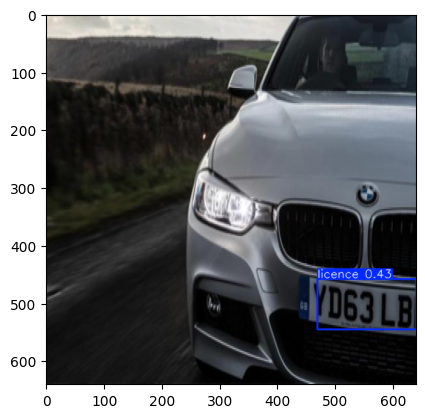

['LB', '7d63']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars370_png.rf.c2687895bb35d17bc594bf73e6011dfa.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars370_png.rf.c2687895bb35d17bc594bf73e6011dfa.jpg: 640x640 1 licence, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


['CHO1AnOOO']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars225_png.rf.2b8dd17890e0d1baa6259b9109ff6567.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars225_png.rf.2b8dd17890e0d1baa6259b9109ff6567.jpg: 640x640 1 licence, 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


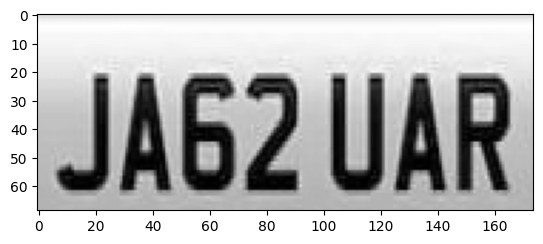

['JA62 UAR']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars355_png.rf.36eca1b6b379cb3010b1cd1506ef35da.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars355_png.rf.36eca1b6b379cb3010b1cd1506ef35da.jpg: 640x640 2 licences, 7.2ms
Speed: 1.6ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


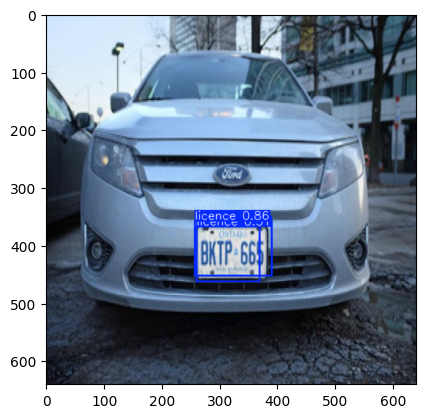

['Uttanu', 'BKTP:665']


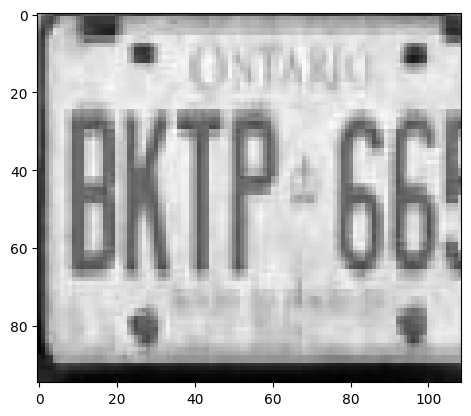

['BKTP: G65']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars165_png.rf.2611078d14059a2753e0efaf93efc8dc.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars165_png.rf.2611078d14059a2753e0efaf93efc8dc.jpg: 640x640 1 licence, 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


['FwZaV MD']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars296_png.rf.0827aadac5430b6534979e8345dd21f8.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars296_png.rf.0827aadac5430b6534979e8345dd21f8.jpg: 640x640 1 licence, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


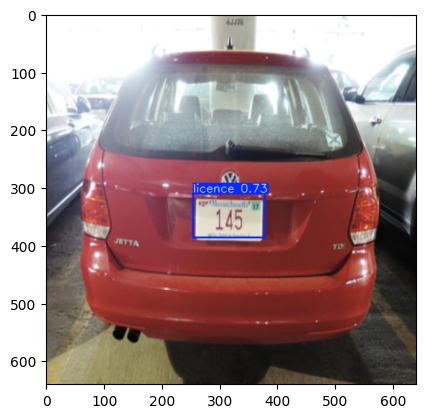

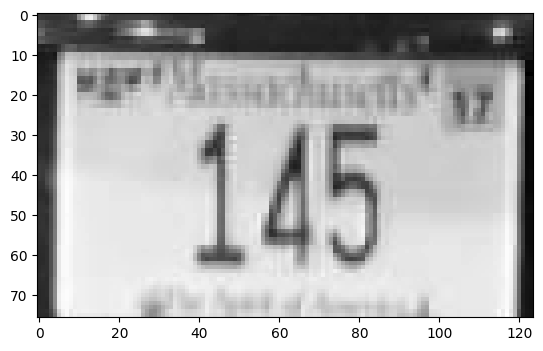

['145']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars35_png.rf.0e781eb06030e5eb16551aa5300daf27.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars35_png.rf.0e781eb06030e5eb16551aa5300daf27.jpg: 640x640 (no detections), 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars110_png.rf.0fb5f7f7064c021ff4cf82cfbab14ffc.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars110_png.rf.0fb5f7f7064c021ff4cf82cfbab14ffc.jpg: 640x640 (no detections), 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars222_png.rf.418055981c6950d28aa109aee4a6172a.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars222_png.rf.418055981c6950d28aa109aee4a6172a.jpg: 640x640 1 licence, 7.7ms
Speed: 1.6ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


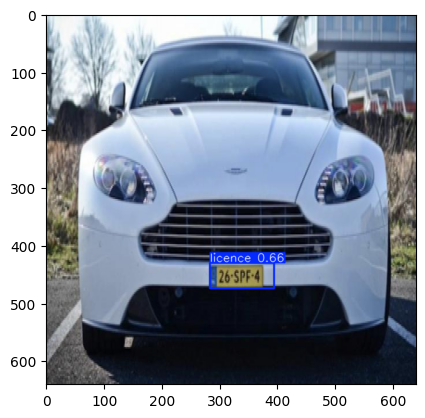

['126 SPF-4']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars306_png.rf.cc863bef609d5be07c502b1b687b0a6a.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars306_png.rf.cc863bef609d5be07c502b1b687b0a6a.jpg: 640x640 1 licence, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


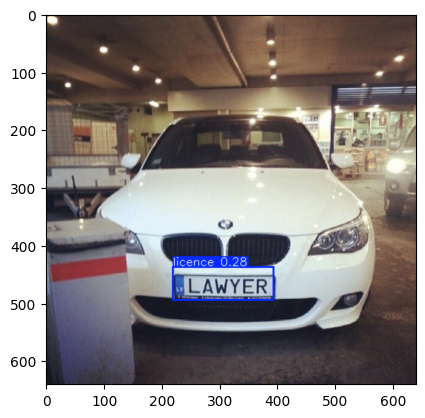

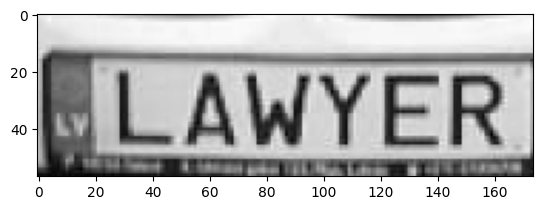

['LAWYER']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars339_png.rf.839e3bba2821a48e12dc0f3af28136c8.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars339_png.rf.839e3bba2821a48e12dc0f3af28136c8.jpg: 640x640 1 licence, 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


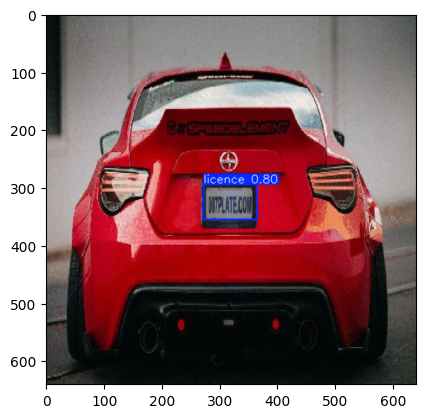

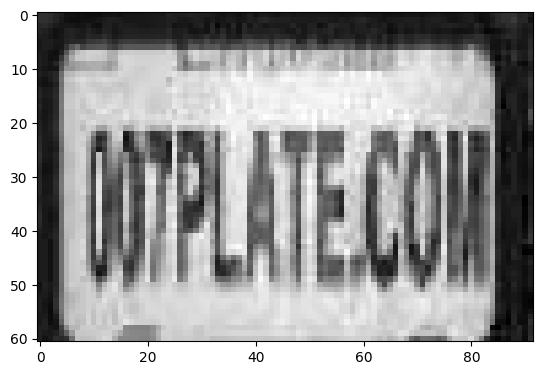

['JWHLTEA']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars77_png.rf.813f70153530f64a64131b5488bb99f5.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars77_png.rf.813f70153530f64a64131b5488bb99f5.jpg: 640x640 1 licence, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


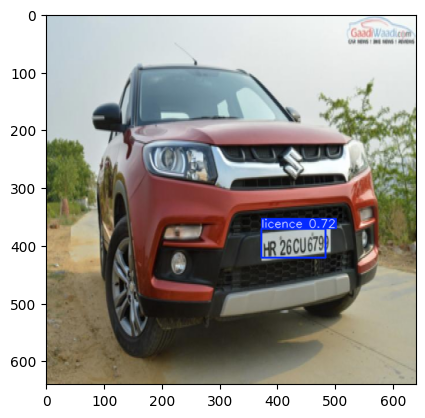

['IR 26CU679']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars136_png.rf.8c422abdd90dbd76d15a5ddbfd0cd2dd.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars136_png.rf.8c422abdd90dbd76d15a5ddbfd0cd2dd.jpg: 640x640 2 licences, 7.6ms
Speed: 2.1ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


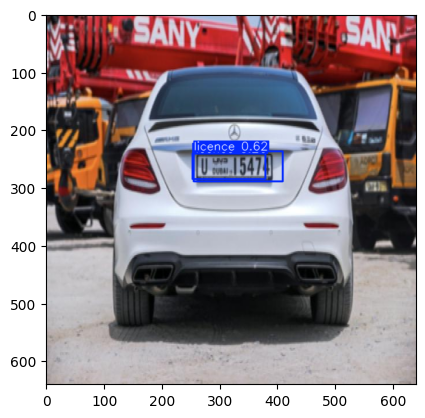

['Bi']


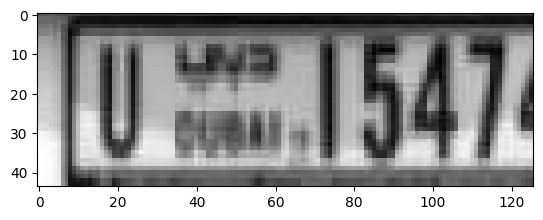

['JAL']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars257_png.rf.2a54d35fd5dfd01c74dbe5e7e5681e2c.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars257_png.rf.2a54d35fd5dfd01c74dbe5e7e5681e2c.jpg: 640x640 1 licence, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


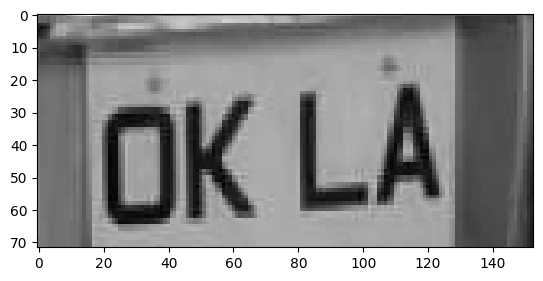

['OK LA']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars74_png.rf.32bb9f7dfc0b7fe6eaedcb39f58ed6e9.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars74_png.rf.32bb9f7dfc0b7fe6eaedcb39f58ed6e9.jpg: 640x640 1 licence, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


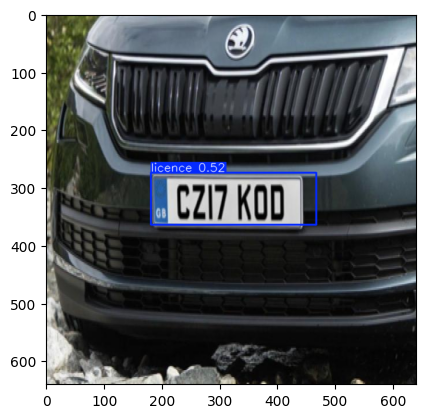

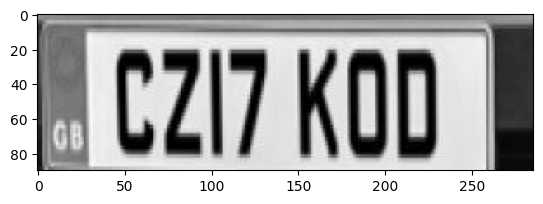

['0b', 'C2I7 Kop']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars430_png.rf.6102a76b50399943ce845eeef10fb299.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars430_png.rf.6102a76b50399943ce845eeef10fb299.jpg: 640x640 1 licence, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


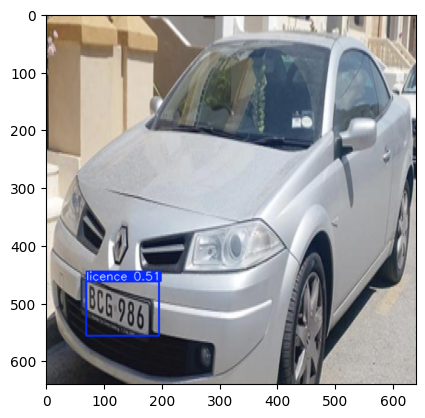

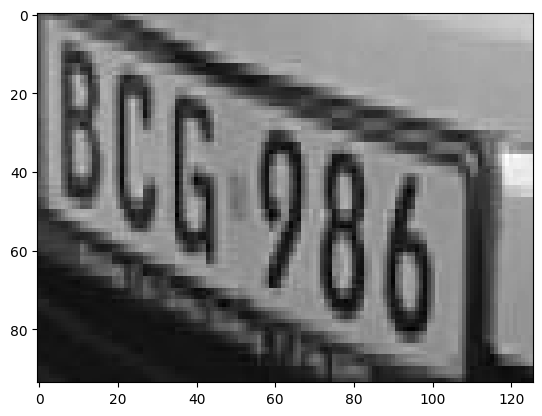

['0u6pb0']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars28_png.rf.0bb6fee0bf0906381b0dd27b17876e91.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars28_png.rf.0bb6fee0bf0906381b0dd27b17876e91.jpg: 640x640 1 licence, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


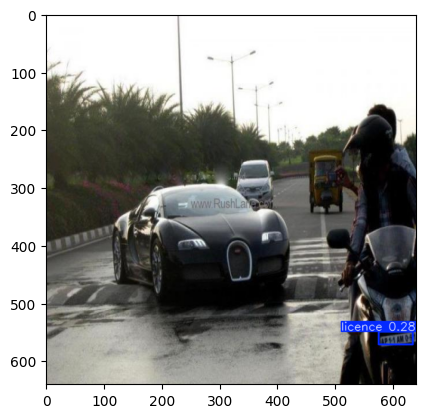

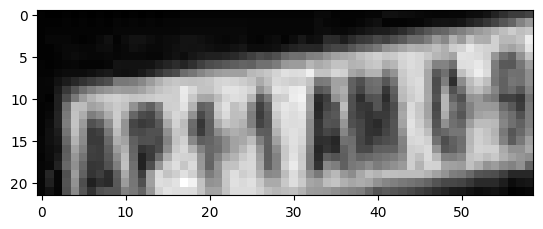

[]
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars260_png.rf.e99e4f02ac376e892808ba598c15be39.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars260_png.rf.e99e4f02ac376e892808ba598c15be39.jpg: 640x640 2 licences, 10.4ms
Speed: 2.1ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


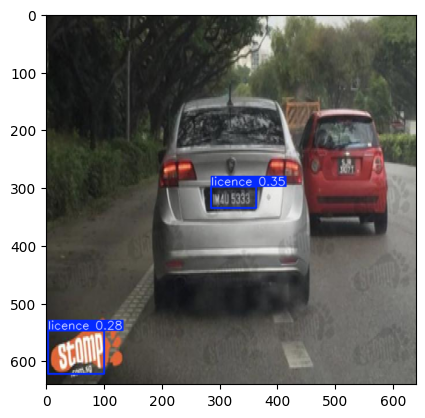

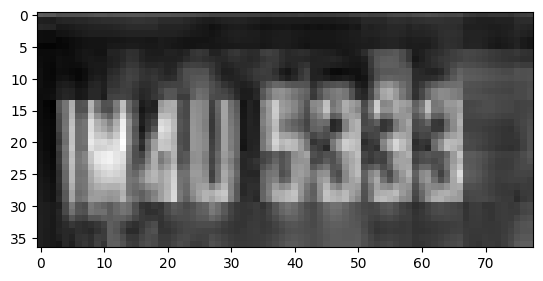

['IIUSaa]']


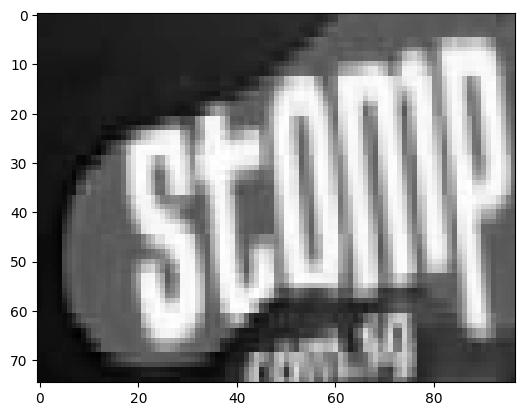

['StM']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars137_png.rf.03f633ac7191fc151531dff8c36d3096.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars137_png.rf.03f633ac7191fc151531dff8c36d3096.jpg: 640x640 (no detections), 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


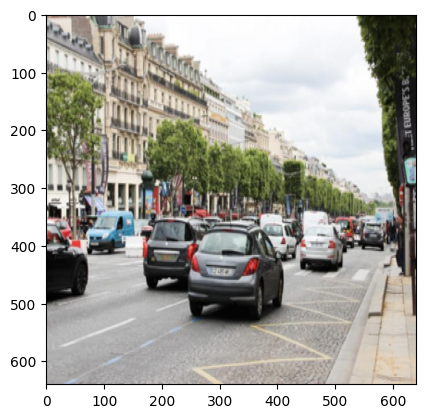

Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars216_png.rf.54bad493277b65a5536478deb1b7ae20.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars216_png.rf.54bad493277b65a5536478deb1b7ae20.jpg: 640x640 1 licence, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


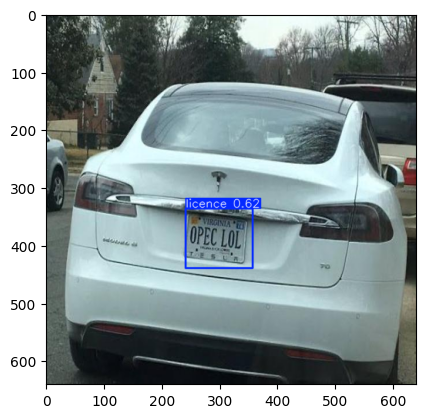

['OPEC LoL']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars407_png.rf.588240e25015be3fad45fabf2b1d1ba8.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars407_png.rf.588240e25015be3fad45fabf2b1d1ba8.jpg: 640x640 1 licence, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


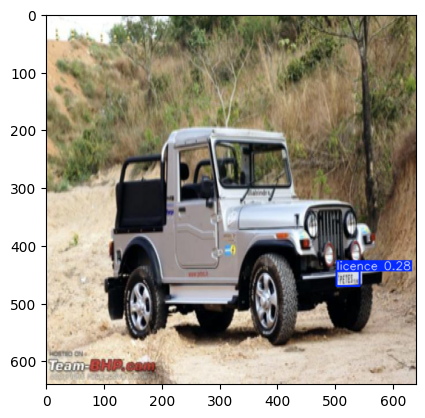

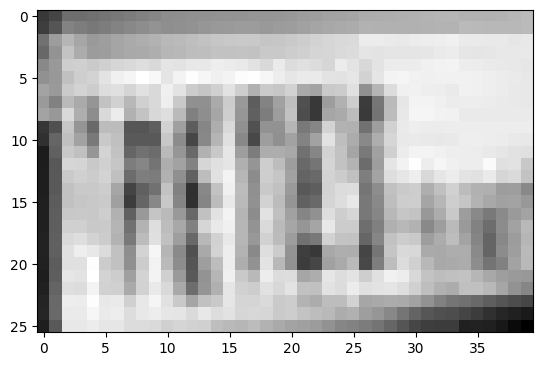

[]
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars128_png.rf.995c1679d7516e4c6b58072f11b8ca32.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars128_png.rf.995c1679d7516e4c6b58072f11b8ca32.jpg: 640x640 (no detections), 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


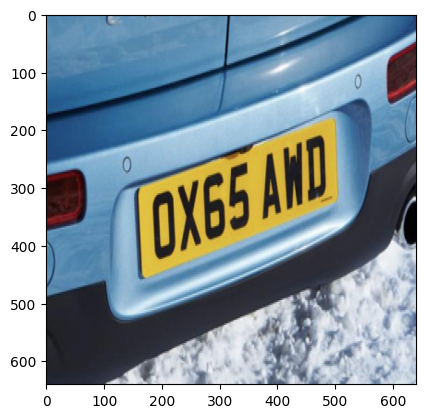

Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars47_png.rf.8fc1635f4df605b770c227ab39204e15.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars47_png.rf.8fc1635f4df605b770c227ab39204e15.jpg: 640x640 2 licences, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


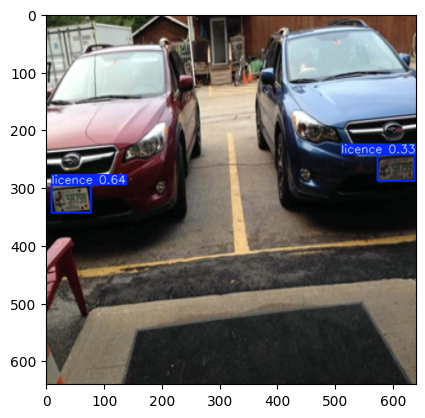

[]


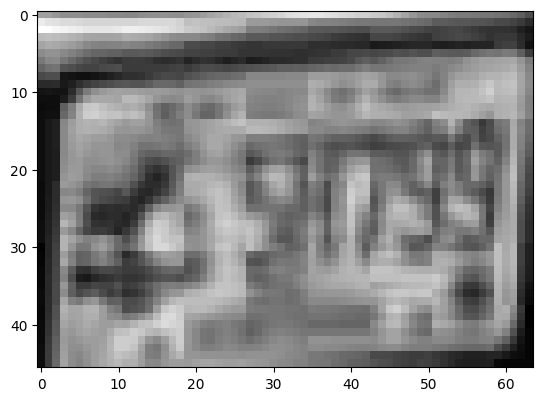

[]
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars187_png.rf.730a23d256425f23f52323a6811d946f.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars187_png.rf.730a23d256425f23f52323a6811d946f.jpg: 640x640 1 licence, 7.2ms
Speed: 1.6ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


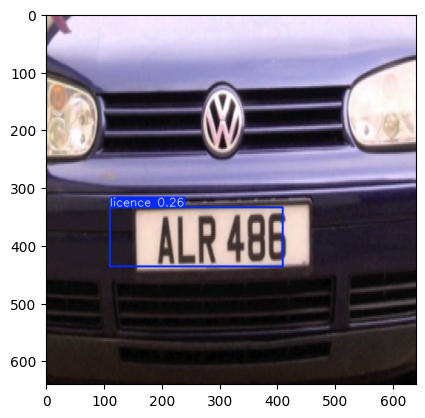

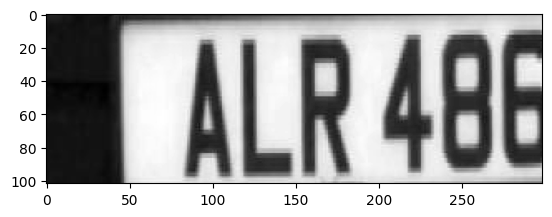

['ALR 4B6']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars421_png.rf.3786dc4705f4f1997a0561606fad238e.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars421_png.rf.3786dc4705f4f1997a0561606fad238e.jpg: 640x640 1 licence, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


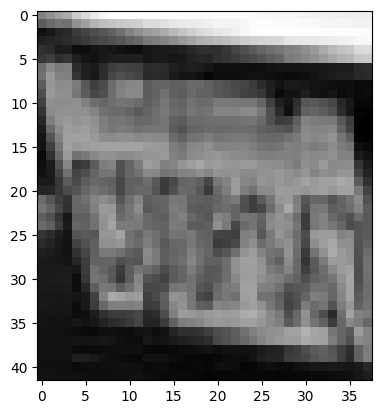

[]
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars340_png.rf.5b8a0a98e27c430a598a5ca502a37fd0.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars340_png.rf.5b8a0a98e27c430a598a5ca502a37fd0.jpg: 640x640 1 licence, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


['VYSFH']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars206_png.rf.53dbcc3ceb6314a10be76ed551ac5893.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars206_png.rf.53dbcc3ceb6314a10be76ed551ac5893.jpg: 640x640 1 licence, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


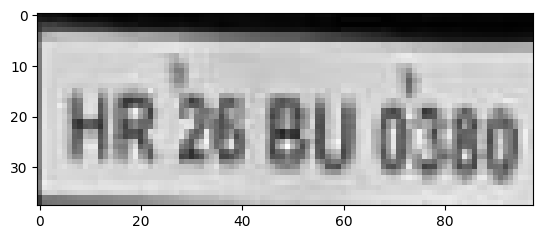

['HR z5 BU 0380']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars172_png.rf.2ebc5a2332f409f218de3dd707f9f9f9.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars172_png.rf.2ebc5a2332f409f218de3dd707f9f9f9.jpg: 640x640 1 licence, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


['MC', '09']
Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars289_png.rf.c891a04e07165fef2ad80b64d942b4f2.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars289_png.rf.c891a04e07165fef2ad80b64d942b4f2.jpg: 640x640 (no detections), 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


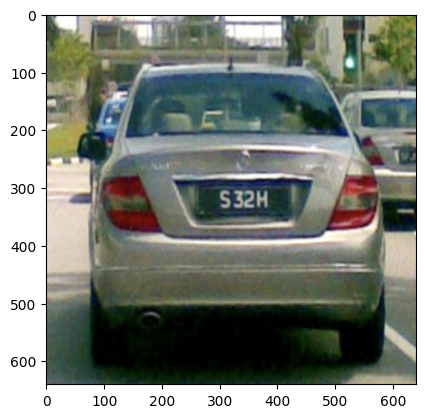

Processing image: /kaggle/input/no-platedetection/archive/test/images/Cars229_png.rf.50141804ceb275dd0a63a8019e34a15a.jpg

image 1/1 /kaggle/input/no-platedetection/archive/test/images/Cars229_png.rf.50141804ceb275dd0a63a8019e34a15a.jpg: 640x640 (no detections), 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
the shape of array is (640, 640, 3)


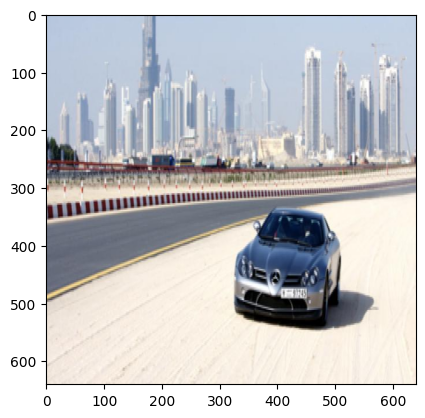

In [7]:
testimages = '/kaggle/input/no-platedetection/archive/test/images'   ##input directory for test images.

for i, image in enumerate(os.listdir(testimages)):
    image_path = os.path.join(testimages, image)
    
    # Print the image path for debugging
    print(f"Processing image: {image_path}")

    # Call the num_plate function
    extract_plate(image_path)
